## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 9b: Functions and Apply

### Functions

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 9)

In [54]:
def percents(counts, decimal_places=2):
    """Convert the counts to percents out of the total."""
    total = sum(counts)
    return np.round((counts / total) * 100, decimal_places)

parts = np.array([2, 1, 4])
print("Rounded to 1 decimal place:", percents(parts, 1), "or", 
      percents(parts, decimal_places=1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1] or [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


### Apply

In [55]:
def cut_off_at_a_billion(x):
    """The smaller of x and 1,000,000,000"""
    return min(x, 1e9)

In [56]:
# Function applies to single column can use 'map' instead of 'apply'
movies = pd.read_csv('data/top_movies_2017.csv')
movies['Adjusted with cutoff'] = movies['Gross (Adjusted)'].map(cut_off_at_a_billion)
movies

,Title,Studio,Gross,Gross (Adjusted),Year,Adjusted with cutoff
0,Gone with the Wind,MGM,198676459,1796176700,1939,1.000000e+09
1,Star Wars,Fox,460998007,1583483200,1977,1.000000e+09
2,The Sound of Music,Fox,158671368,1266072700,1965,1.000000e+09
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1.000000e+09
...,...,...,...,...,...,...
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016,3.401370e+08
197,The Firm,Paramount,158348367,340028200,1993,3.400282e+08
198,Suicide Squad,Warner Brothers,325100054,339411900,2016,3.394119e+08
199,Who Framed Roger Rabbit,Buena Vista,156452370,338409100,1988,3.384091e+08


### Prediction

In [57]:
galton = pd.read_csv('data/galton.csv')
height = galton.loc[:, ['father', 'mother', 'childHeight']]
height.rename(columns={'childHeight':'child'}, inplace=True)
height

,father,mother,child
0,78.5,67.0,73.2
1,78.5,67.0,69.2
2,78.5,67.0,69.0
3,78.5,67.0,69.0
...,...,...,...
930,62.0,66.0,62.0
931,62.0,66.0,61.0
932,62.5,63.0,66.5
933,62.5,63.0,57.0


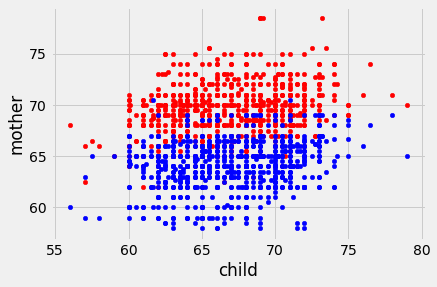

In [61]:
ax = height.plot.scatter('child', 'father', color='red')
height.plot.scatter('child', 'mother', color='blue', ax=ax)
plt.show()

In [64]:
height['parent_average'] = (height.father + height.mother) / 2
height

,father,mother,child,parent_average
0,78.5,67.0,73.2,72.75
1,78.5,67.0,69.2,72.75
2,78.5,67.0,69.0,72.75
3,78.5,67.0,69.0,72.75
...,...,...,...,...
930,62.0,66.0,62.0,64.00
931,62.0,66.0,61.0,64.00
932,62.5,63.0,66.5,62.75
933,62.5,63.0,57.0,62.75


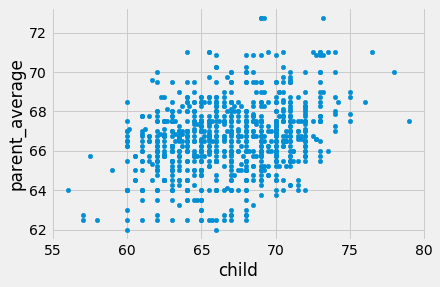

In [67]:
height.plot.scatter('child', 'parent_average')
plt.show()

In [72]:
close_to_68 = height.child.loc[(height.parent_average >= 67.5) &
                               (height.parent_average < 68.5)]

close_to_68.mean()

67.62

In [73]:
def predict_child(pa):
    return height.child.loc[(height.parent_average >= pa - 0.5) &
                            (height.parent_average < pa + 0.5)].mean()

In [75]:
height['prediction'] = height.parent_average.map(predict_child)

In [76]:
height

,father,mother,child,parent_average,prediction
0,78.5,67.0,73.2,72.75,70.10000
1,78.5,67.0,69.2,72.75,70.10000
2,78.5,67.0,69.0,72.75,70.10000
3,78.5,67.0,69.0,72.75,70.10000
...,...,...,...,...,...
930,62.0,66.0,62.0,64.00,64.91500
931,62.0,66.0,61.0,64.00,64.91500
932,62.5,63.0,66.5,62.75,64.22963
933,62.5,63.0,57.0,62.75,64.22963


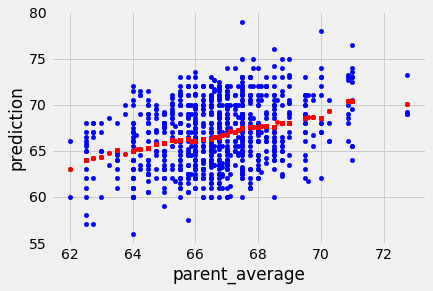

In [80]:
ax = height.plot.scatter('parent_average', 'child', color='blue')
height.plot.scatter('parent_average', 'prediction', color='red', ax=ax)


plt.show()